In [ ]:
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=924e2674a6e0bb31b1cf5e3985a061a55248ed70cf64943c9b69287255846a8e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


**OBJECTIVE**: The objective of this project is to develop a predictive model that can accurately forecast the average price of avocados in the market based on historical data. By analyzing various features such as total volume sold, type of avocado, region, and others, we aim to understand the key factors that influence avocado pricing and create a tool that stakeholders can use to anticipate price fluctuations.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [11]:
data = pd.read_csv('/content/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


1st Question - What are the data types? (Only numeric and categorical)

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
print('numerical columns List-',numeric_columns)
print('categorical columns List-',categorical_columns)

numerical columns List- Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')
categorical columns List- Index(['Date', 'type', 'region'], dtype='object')


2nd Question - Are there missing values?

ANS. No, there are no missing values in the dataset

In [ ]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

3rd Question - What are the likely distributions of the numeric variables?

ANS. **AveragePrice:** The Q-Q plot deviates from the line at both tails, indicating a slight right skew, which means the distribution has a longer tail on the right side. It is not perfectly normal but close to it in the center of the distribution.

**Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags:** All these variables show a similar pattern in their Q-Q plots. They deviate significantly from the line across the entire range of data, especially at the higher quantiles. This indicates a right-skewed distribution with a long tail to the right.

**XLarge Bags:** Similar to the other volume-related variables, the Q-Q plot for XLarge Bags shows a pronounced right skew. The deviation from the normal line is extreme, this suggests that the distribution is highly skewed and has many outliers.

**Year:** Since the year is a discrete variable and not continuous, the Q-Q plot is not appropriate for this type of data. This indicates that the data is not distributed normally and is categorical.

In [26]:
columns_to_drop = ['Unnamed: 0'] #Removing unwanted column from the dataset to avoid deviations in model

avo_df = data.drop(columns_to_drop, axis=1)

display(avo_df.head())

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


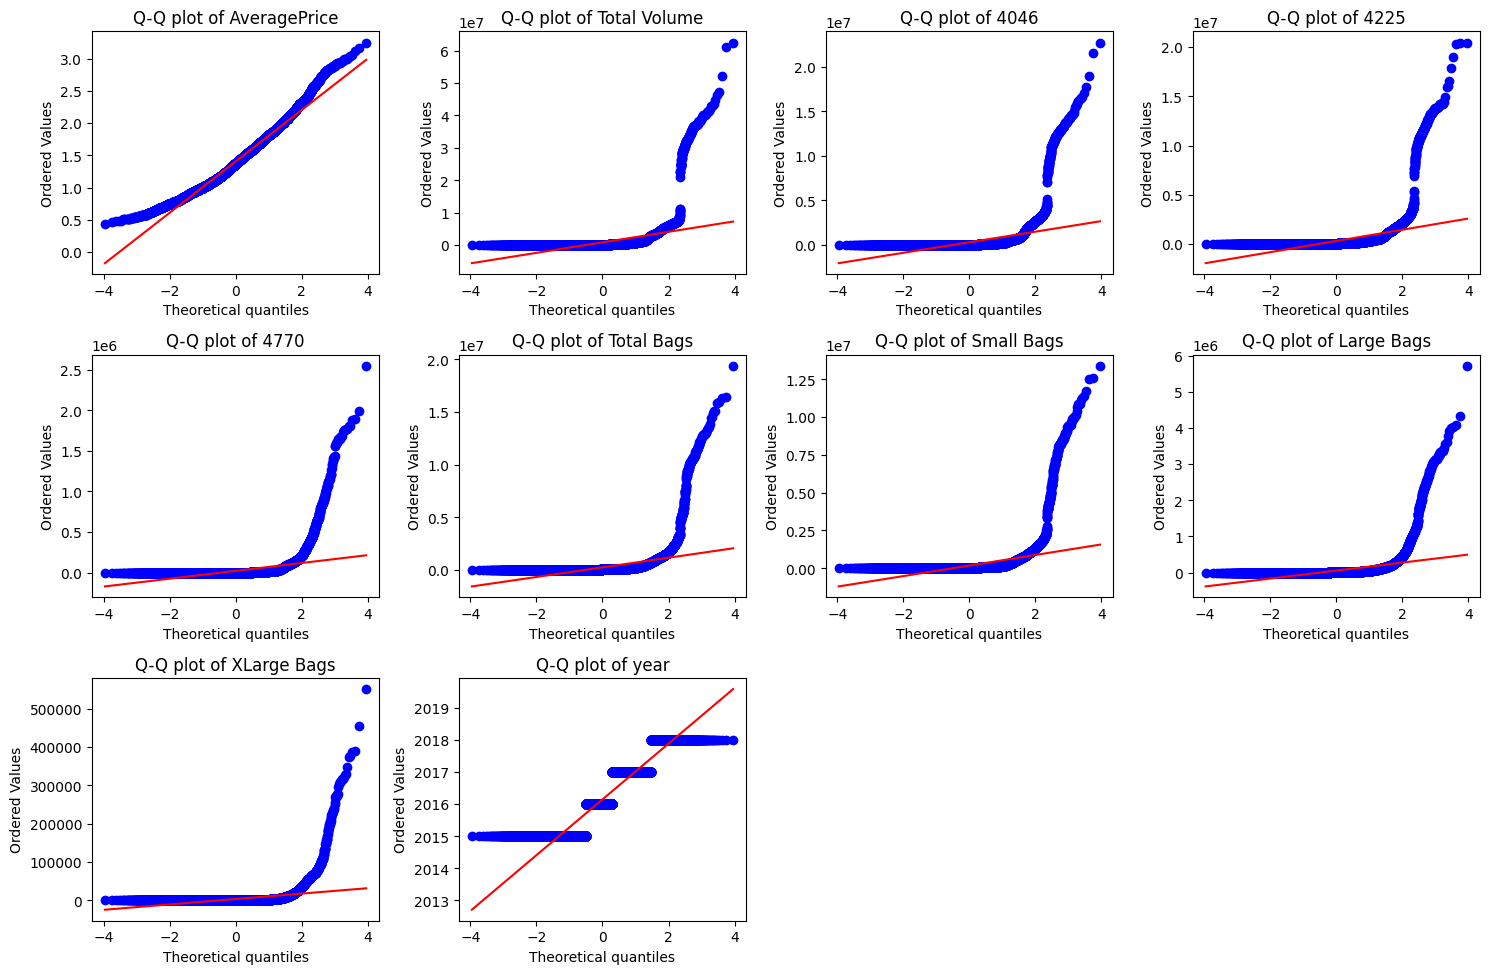

In [31]:
import scipy.stats as stats

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Unnamed: 0')


# Plotting Q-Q plots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)  # Adjust the grid size according to the number of numerical columns
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title('Q-Q plot of ' + column)

plt.tight_layout()
plt.show()

4th question - Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

<ipython-input-55-35c3e242ce04>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


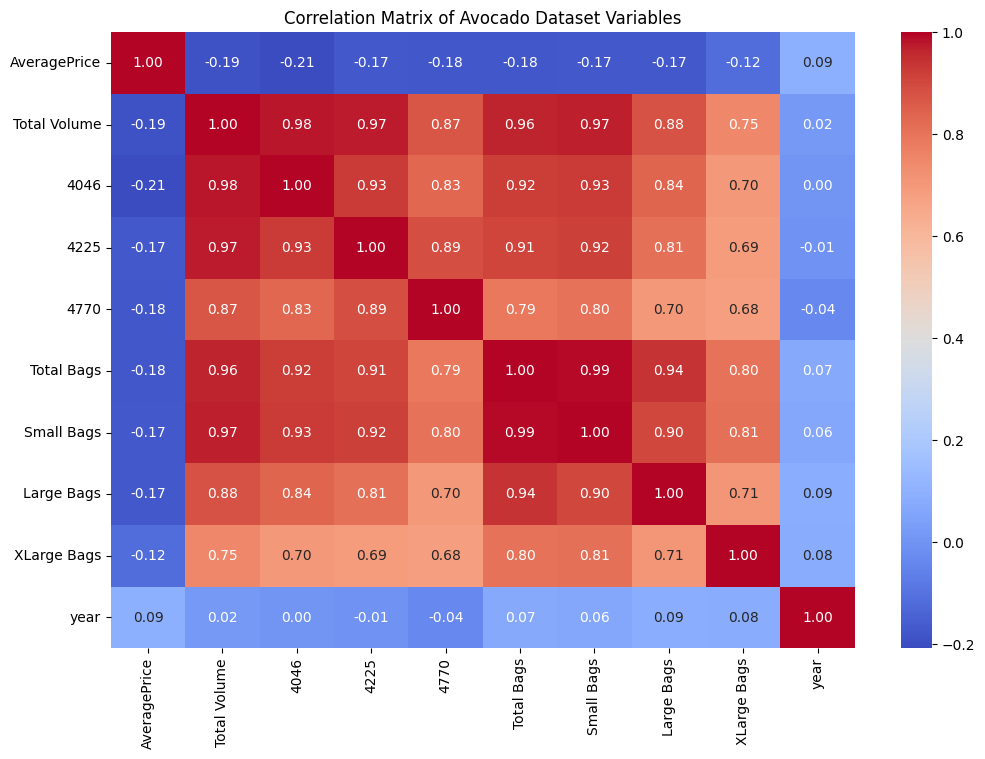

AveragePrice    1.000000
year            0.093197
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [55]:
#1st Method -- Correlative analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Dropping the 'Unnamed: 0' column as it seems to be an index-like column without much relevance
data.drop('Unnamed: 0', axis=1, inplace=True)

# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Avocado Dataset Variables')
plt.show()

# Displaying the correlation values of independent variables with 'AveragePrice'
correlation_with_target = correlation_matrix['AveragePrice'].sort_values(ascending=False)
correlation_with_target


There is a slight positive correlation with year, indicating that average prices may have a tendency to increase over the years, though the correlation is weak.
XLarge Bags, 4225, Large Bags, Small Bags, Total Bags, 4770, Total Volume, and 4046 show negative correlations with AveragePrice. This suggests that as the sales volume increases, the average price tends to decrease. Among these, 4046 (a specific type of avocado) has the strongest negative correlation with AveragePrice, indicating a more pronounced effect.


In [43]:
#2nd method -- random forest method

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the dataset for modeling
df_model = data.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
df_model['type_encoded'] = label_encoder.fit_transform(df_model['type'])
df_model['region_encoded'] = label_encoder.fit_transform(df_model['region'])

# Select features and target variable
X = df_model.drop(['Date', 'AveragePrice', 'type', 'region'], axis=1)
y = df_model['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances


type_encoded      0.383246
Large Bags        0.091123
4046              0.089080
Month             0.088455
4225              0.077248
year              0.065343
Small Bags        0.041183
region_encoded    0.040873
Total Bags        0.035342
4770              0.035035
Total Volume      0.032062
Day               0.013670
XLarge Bags       0.007341
DayOfWeek         0.000000
dtype: float64

type_encoded (the encoded version of the type variable, which distinguishes between conventional and organic avocados) is the most important feature, having the highest influence on predicting AveragePrice.
Large Bags and 4046 (a specific type/size of avocado) are also significant predictors, indicating their notable impact on the average price.
Other variables such as 4225, Small Bags, and region_encoded also contribute to the model but to a lesser extent.


In [44]:
#3rd method - linera regression

from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Get coefficients
coefficients = pd.Series(linear_regression.coef_, index=X.columns)

# Adjust for scale differences
scaled_coefficients = coefficients * np.std(X_train, 0) / np.std(y_train)

scaled_coefficients.sort_values(ascending=False)


Small Bags        54205.865916
Large Bags        17823.087231
XLarge Bags        1306.554997
4046                222.867228
4225                214.915819
4770                 19.218528
type_encoded          0.610015
Month                 0.175880
year                  0.120952
Day                   0.020077
region_encoded        0.008978
DayOfWeek             0.000000
Total Volume       -611.134210
Total Bags       -71583.299327
dtype: float64

Small Bags and Large Bags have significant positive scaled coefficients, suggesting that as the number of small and large bags sold increases, the average price tends to increase substantially.
XLarge Bags, 4046, 4225, and 4770 also have positive coefficients, but their magnitudes are smaller, indicating a less pronounced impact on the average price.
type_encoded (representing the type of avocado) and year have positive coefficients, suggesting a slight increase in average price with these variables.
Interestingly, Total Volume and Total Bags have large negative scaled coefficients, indicating that an increase in these variables is associated with a decrease in the average price, which aligns with the negative correlations observed earlier.


5th question - Which independent variables have missing data? How much?

ANS. Here, in this dataset it doesn't have any missinng values.

In [47]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/avocado.csv')

# Calculate the number of missing values for each column
missing_data_counts = data.isnull().sum()

# Filter out the columns that have missing values
#missing_data_columns = missing_data_counts[missing_data_counts > 0]

print(missing_data_counts)


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


6th Question - Do the training and test sets have the same data?

ANS. The training and test sets do not have the same data.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Split the data
X = data.drop(columns=['AveragePrice'])  # Assuming 'AveragePrice' is the target
y = data['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for overlap
train_test_overlap = pd.merge(X_train, X_test, how='inner')

# If there's overlap, the merged DataFrame won't be empty
overlap_exists = not train_test_overlap.empty
print("overlap exists between training and test sets?", overlap_exists)



overlap exists between training and test sets? False


7th Question - In the predictor variables independent of all the other predictor variables?

ANS. AveragePrice and Year (0.09),
Total Volume and Year (0.02),
4046 (type of avocado) and Year (0.00),
4225 (type of avocado) and Year (-0.01),
4770 (type of avocado) and Year (-0.04),
Total Bags and Year (0.07),
Small Bags and Year (0.06),
Large Bags and Year (0.09),
XLarge Bags and Year (0.08).
All these pairs have correlation coefficients less than 0.1 in absolute value, indicating a very weak or no linear relationship, which could imply independence under a linear assumption.

              Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0  

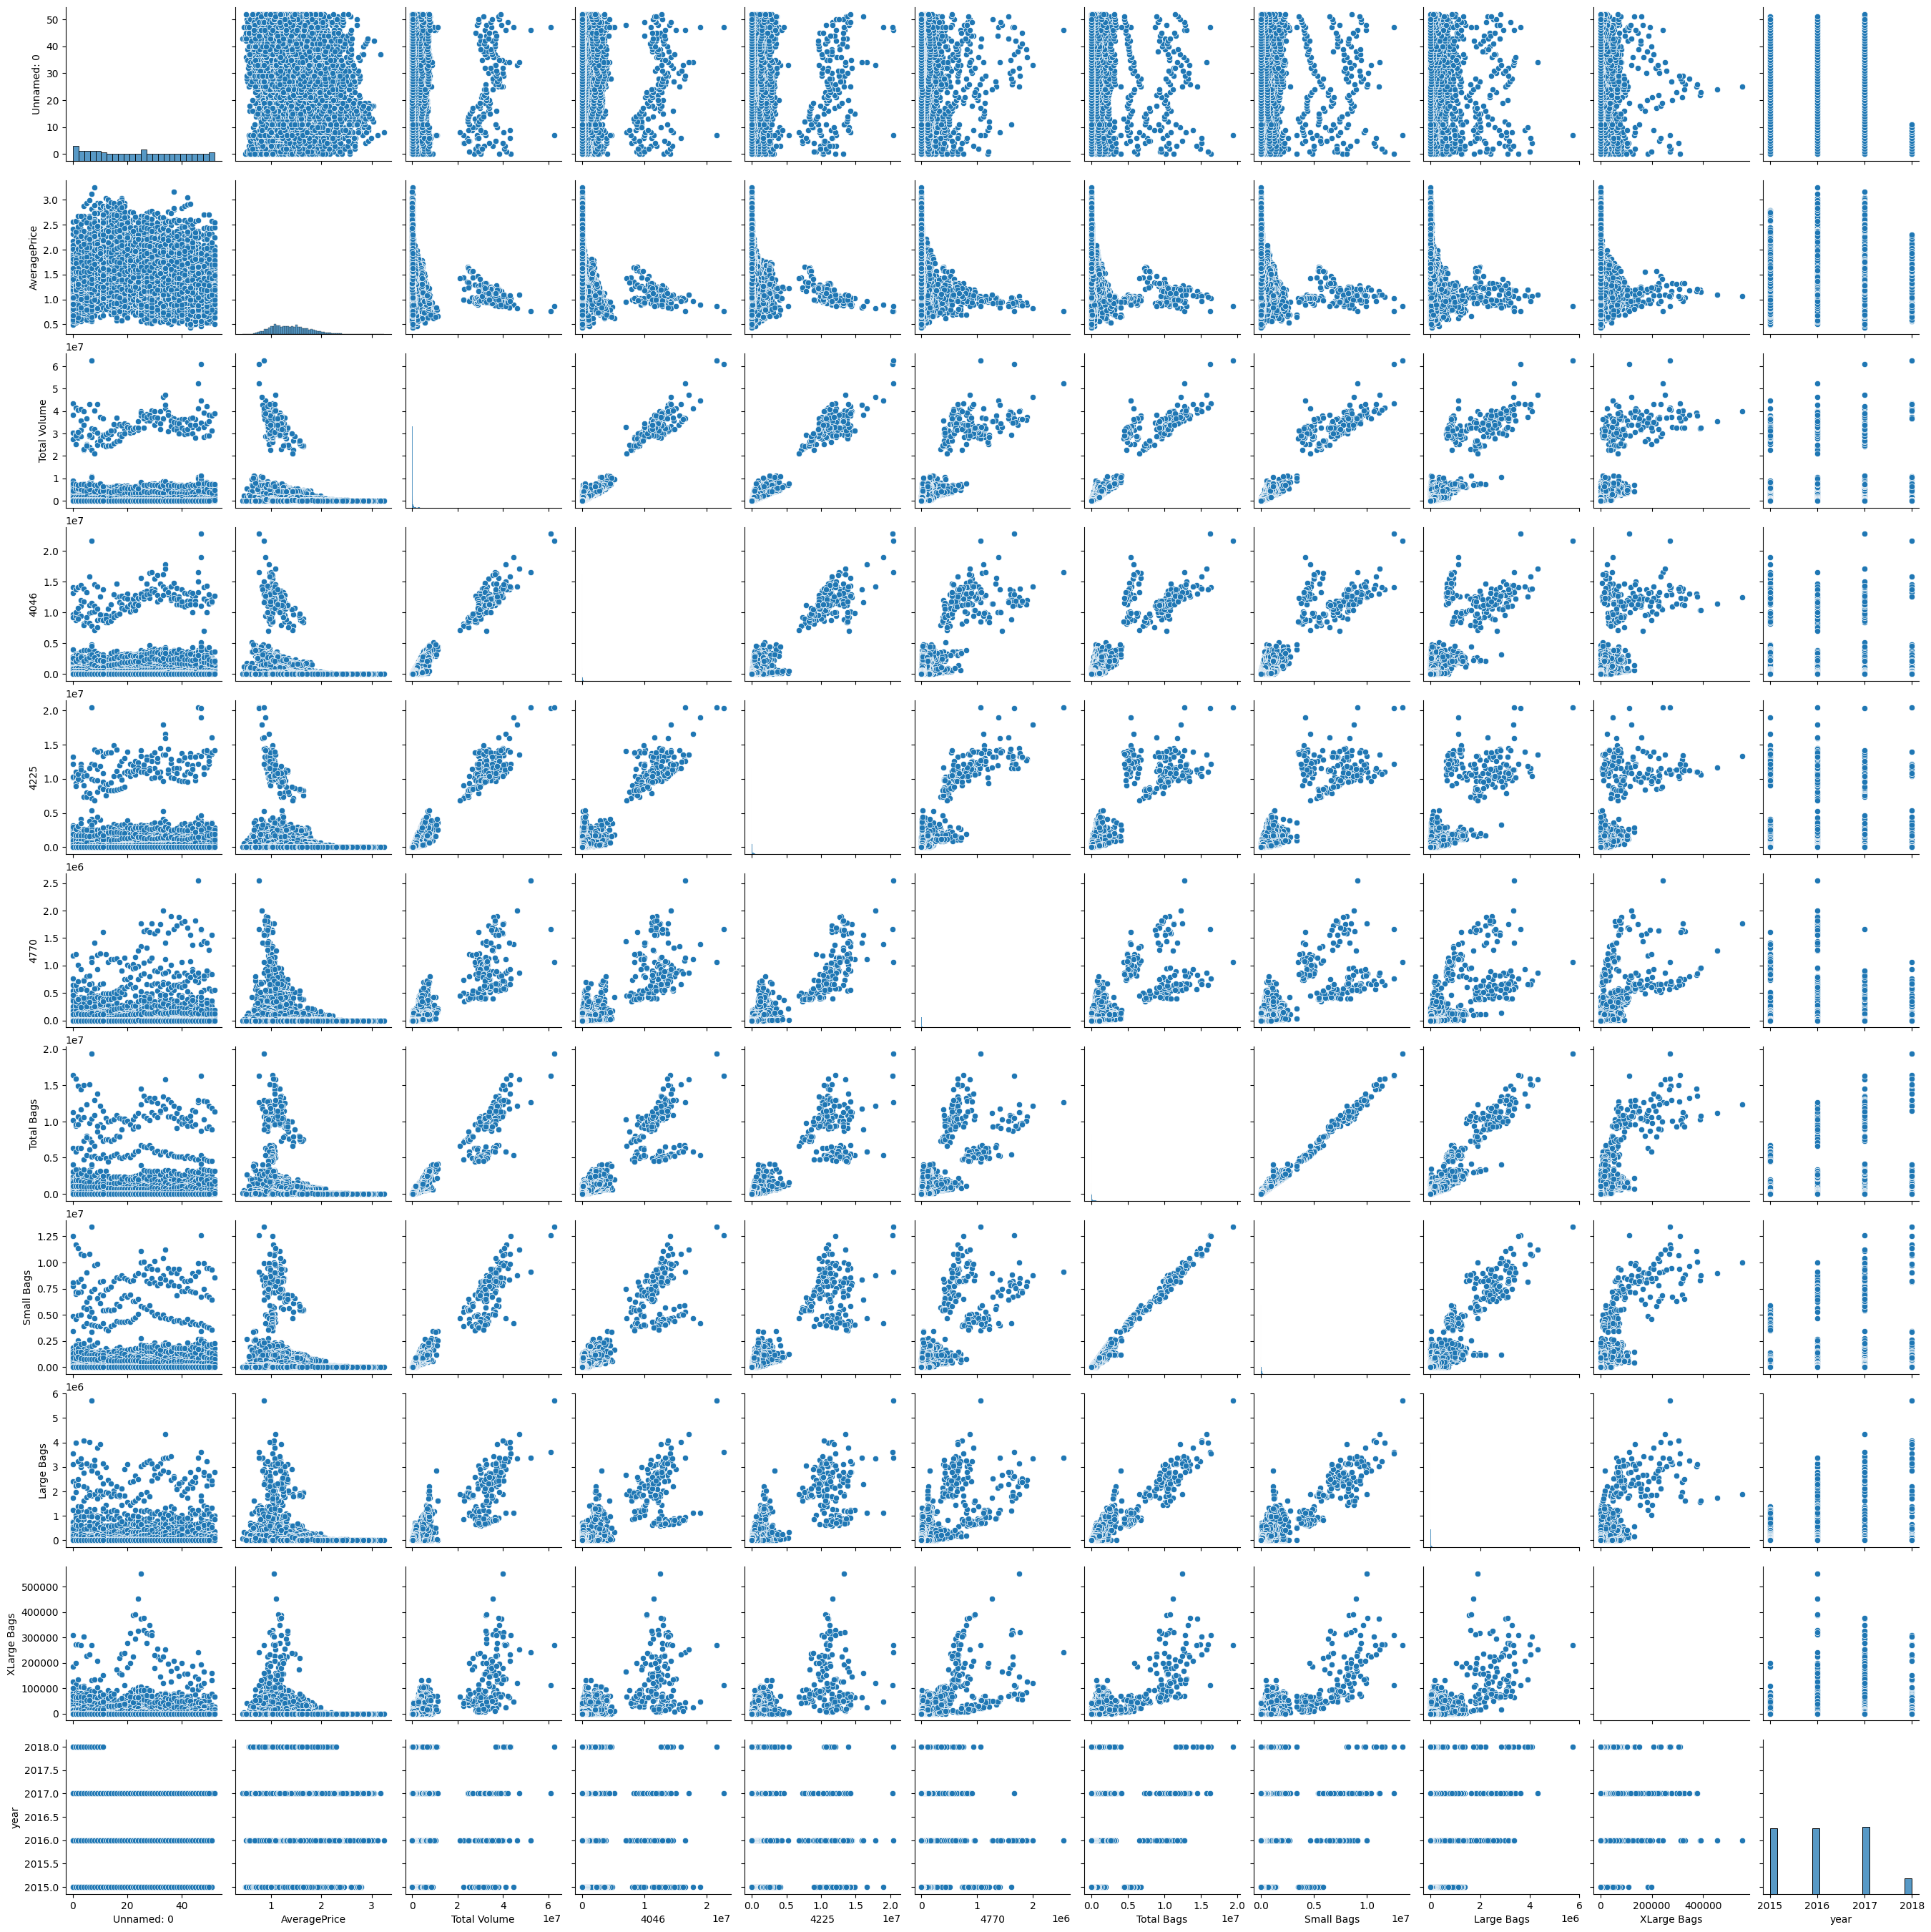

In [79]:
# Calculate the correlation matrix for the numerical variables in the dataset
correlation_matrix = data.select_dtypes(include=[float, int]).corr()

# Display the correlation matrix
print(correlation_matrix)
sns.pairplot(data)


In [58]:
print(data.describe())

       AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   1

8th question - Which predictor variables are the most important?

ANS: The type of avocado (type_encoded) is consistently important across different analyses, indicating a significant distinction between conventional and organic avocados in terms of average price.
The volume and number of bags (especially Small Bags and Large Bags) sold are important predictors, but their effects vary depending on the analysis method.
There is a complex relationship between volume-related variables (like Total Volume, 4046, 4225, 4770) and average price, with some methods suggesting a negative impact on price as volume increases.


9Th question - Do the ranges of the predictor variables make sense?

ANS: **AveragePrice: **The average price of avocados ranges from 0.44 to 3.25 with a mean of approximately 1.41. This range is reasonable for the price of avocados per unit or per pound in various regions and over different times.

**Total Volume and Specific Types (4046, 4225, 4770):** **bold text**

Total Volume: Ranges from approximately 84.56 to over 62 million. This wide range suggests the dataset includes a variety of sales volumes, from individual stores to large aggregations of sales data, potentially across different regions and times.


**4046, 4225, 4770:** These codes represent different sizes or types of avocados. Their volumes also have wide ranges, similar to the total volume, indicating variability in sales among different types. The presence of zeros might indicate no sales for a specific type in certain entries.

**Bags (Total Bags, Small Bags, Large Bags, XLarge Bags):**

The volumes for bags range widely as well, with the maximum values in the millions, indicating significant aggregation of sales data. The presence of zeros, especially in the XLarge Bags, suggests that not all entries involve sales of avocados in this bag size.

**Year:** The year ranges from 2015 to 2018, which is consistent with a dataset collected over four years.

10th Question - What are the distributions of the predictor variables?

ANS: Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags: All these variables show a similar pattern in their Q-Q plots. They deviate significantly from the line across the entire range of data, especially at the higher quantiles. This indicates a right-skewed distribution with a long tail to the right.

XLarge Bags: Similar to the other volume-related variables, the Q-Q plot for XLarge Bags shows a pronounced right skew. The deviation from the normal line is extreme, this suggests that the distribution is highly skewed and has many outliers.

Year: Since the year is a discrete variable and not continuous, the Q-Q plot is not appropriate for this type of data. This indicates that the data is not distributed normally and is categorical.

11th Question - Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [83]:
import pandas as pd

# Load the dataset
avocado_data = data.copy()

# Function to remove outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify indexes of outliers
    outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    # Drop outliers
    df_clean = df.drop(outliers.index, axis=0)

    return df_clean

# Apply the function to remove outliers from the avocado data
avocado_data_clean = remove_outliers(avocado_data.select_dtypes(include=['float64', 'int64']))

# If you want to keep the categorical data and other columns intact, you can merge the cleaned data back
avocado_data_clean = avocado_data_clean.merge(avocado_data.drop(columns=avocado_data.select_dtypes(include=['float64', 'int64']).columns), left_index=True, right_index=True, how='left')

# Now avocado_data_clean is the dataset without outliers
print(avocado_data_clean.describe())
print(data.describe())


         Unnamed: 0  AveragePrice   Total Volume           4046  \
count  11538.000000  11538.000000   11538.000000   11538.000000   
mean      24.337754      1.529875   73959.320578   19059.517078   
std       15.782584      0.356502  108419.105167   42178.274391   
min        0.000000      0.480000      84.560000       0.000000   
25%       10.000000      1.260000    6442.560000     291.677500   
50%       24.000000      1.520000   18532.080000    1757.145000   
75%       38.000000      1.780000  102662.110000   11535.650000   
max       52.000000      2.490000  783913.050000  276253.480000   

                4225          4770     Total Bags     Small Bags  \
count   11538.000000  11538.000000   11538.000000   11538.000000   
mean    28309.994341    846.948754   25741.040382   20686.784972   
std     55526.062604   2361.849292   34310.418695   30179.910998   
min         0.000000      0.000000       0.000000       0.000000   
25%      1201.500000      0.000000    2454.782500    116

Here we can the outliers are remove the dataset copy. The min values are made zero because the these values are far away from the mean value.

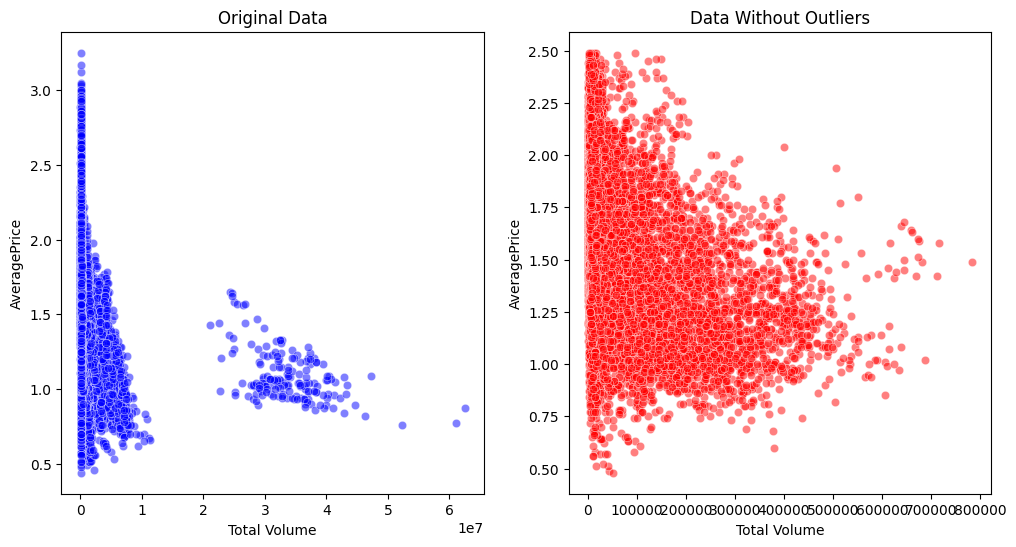

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature' is the column you want to plot
# 'original_data' is your original DataFrame and 'cleaned_data' is after removing outliers

plt.figure(figsize=(12, 6))

# Original data scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data, x='Total Volume', y='AveragePrice', color='blue', alpha=0.5)
plt.title('Original Data')

# Cleaned data scatter plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=avocado_data_clean, x='Total Volume', y='AveragePrice', color='red', alpha=0.5)
plt.title('Data Without Outliers')

plt.show()


Here we can see the scatter plot between "Target variable" and any "predictor variable". we can see plot without outliers gives efficient values.

<Axes: >

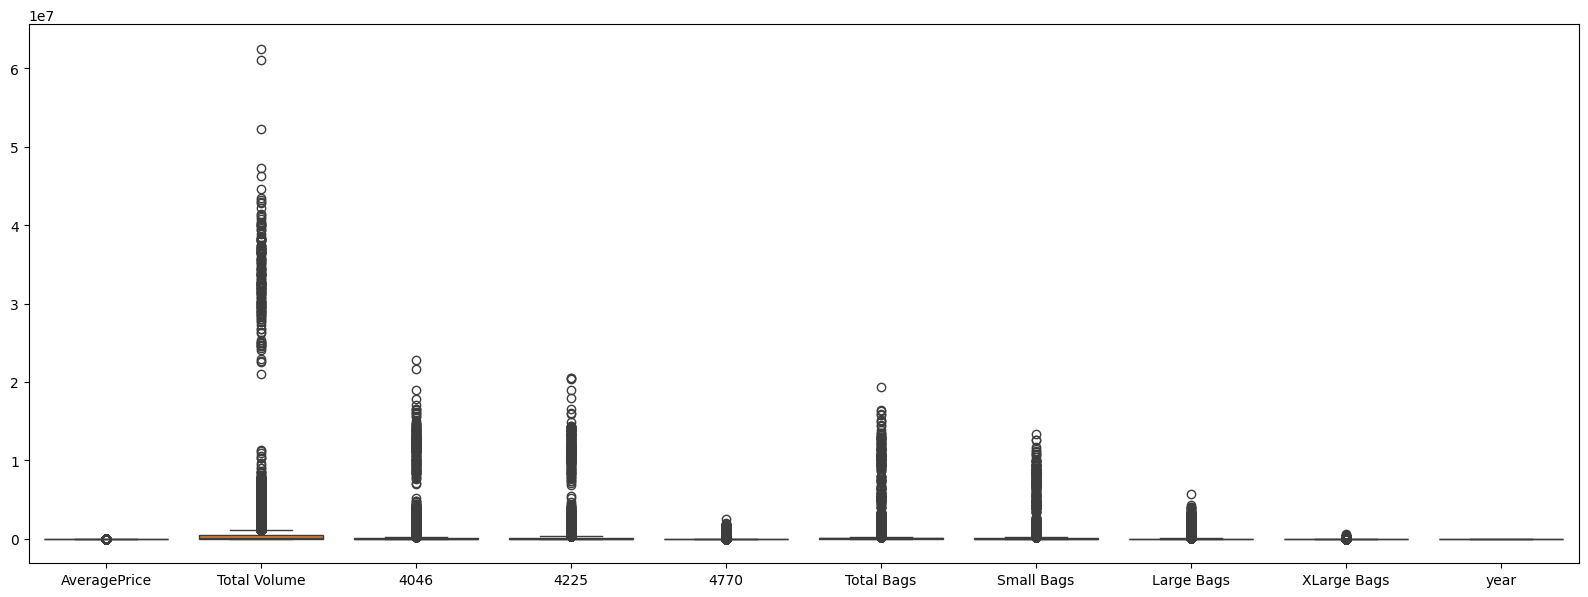

In [60]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'cirrhosis.csv' with your dataset path)
# df = pd.read_csv('cirrhosis.csv', encoding='ISO-8859-1')

# Choose only numeric columns for simplicity in calculating errors
data_numeric = data.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(data, percentage):
    df_copy = data.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy
# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    original_data_nonan = np.nan_to_num(original_data)
    mse = mean_squared_error(original_data_nonan, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")


Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 144931.70343392855
Imputation Method: median, RMSE: 148713.04226981846
Imputation Method: knn, RMSE: 8087.957033458606

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 287600.26286924037
Imputation Method: median, RMSE: 294487.6806061103
Imputation Method: knn, RMSE: 30029.030280670107

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 378266.9846478674
Imputation Method: median, RMSE: 387256.1998982325
Imputation Method: knn, RMSE: 114714.52197071718


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset


# Encode the 'Type' column
le = LabelEncoder()
data['Type_encoded'] = le.fit_transform(data['type'])

# Split the dataset
X = data.drop(columns=['type', 'Type_encoded'])  # Use appropriate features
y = data['Type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (using Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE (note: unconventional for categorical data)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
